In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix


In [2]:
df = pd.read_csv('dataset.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

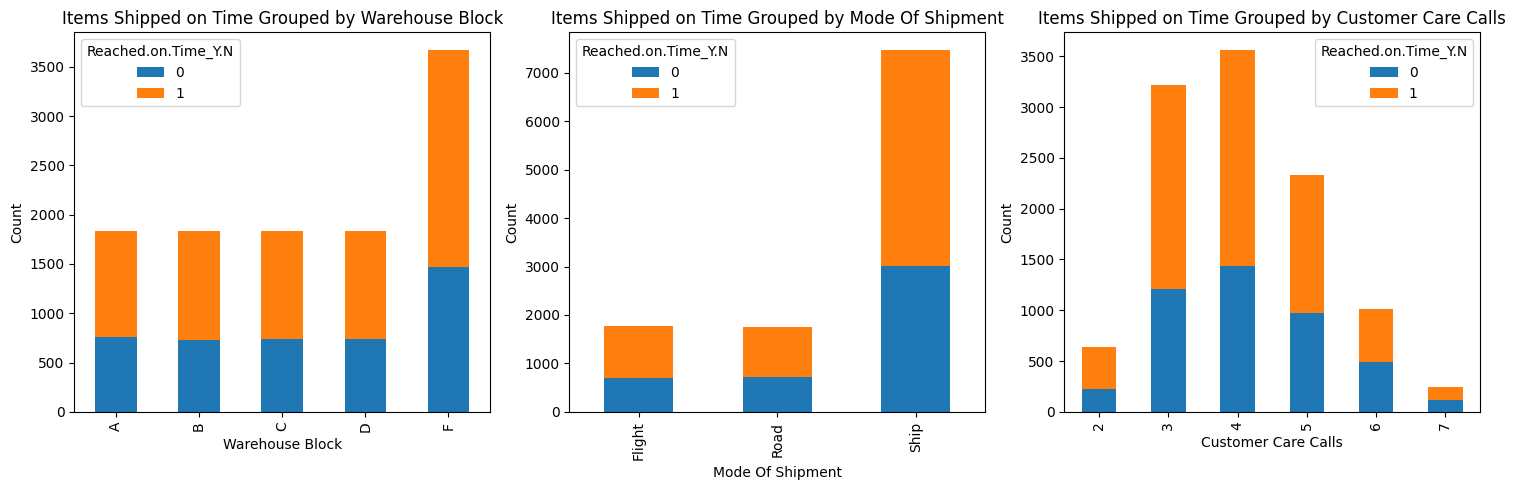

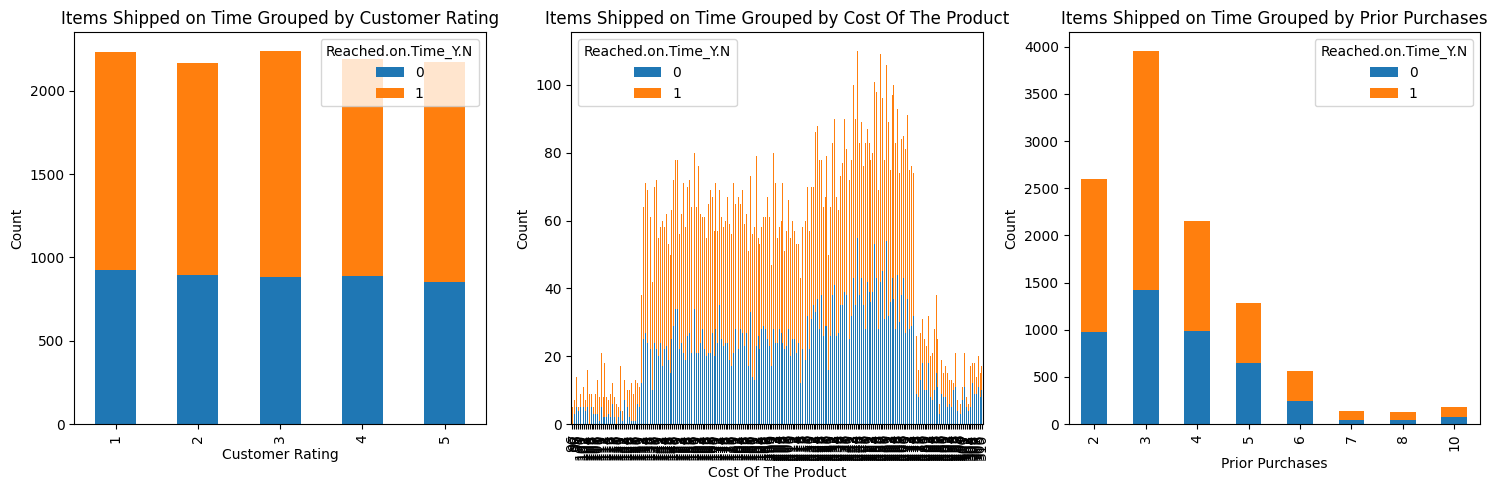

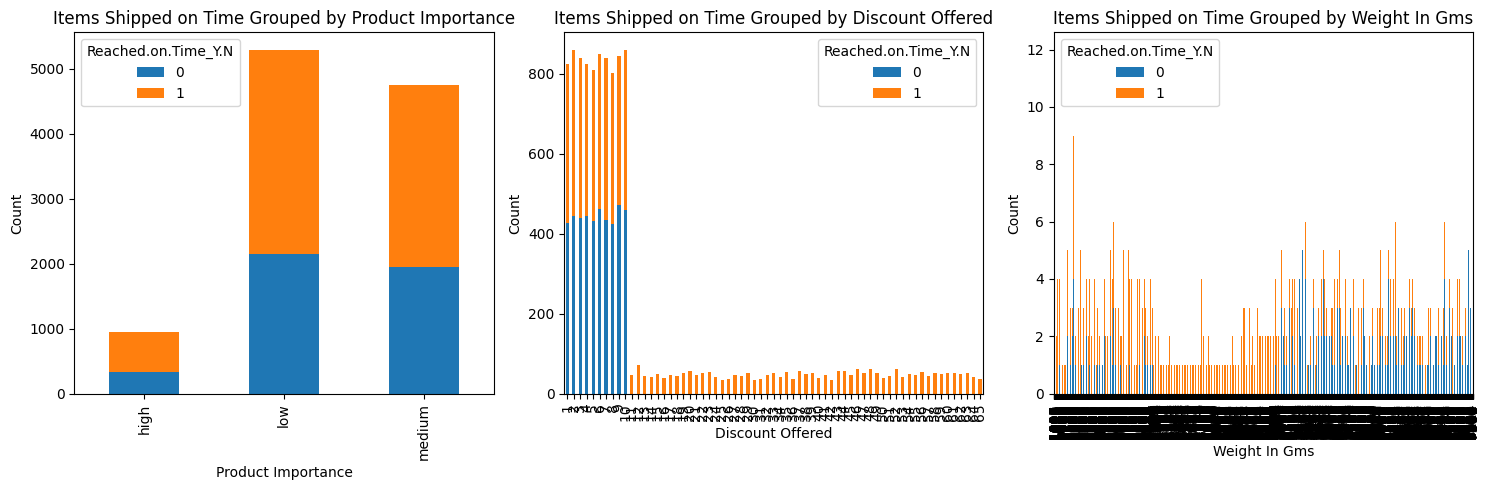

In [5]:
def plot_grouped_data(df, group_by_cols, target_col='Reached.on.Time_Y.N', kind='bar', stacked=True):
    num_plots = len(group_by_cols)
    fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5))
    
    if num_plots == 1:
        axes = [axes]
    
    for ax, group_by_col in zip(axes, group_by_cols):
        grouped = df.groupby([group_by_col, target_col]).size().unstack()
        grouped.plot(kind=kind, stacked=stacked, ax=ax)
        ax.set_xlabel(group_by_col.replace('_', ' ').title())
        ax.set_ylabel('Count')
        ax.set_title(f'Items Shipped on Time Grouped by {group_by_col.replace("_", " ").title()}')

    plt.tight_layout()
    plt.show()

group_by_columns1 = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls']
group_by_columns2 = ['Customer_rating', 'Cost_of_the_Product', 'Prior_purchases']
group_by_columns3 = ['Product_importance', 'Discount_offered', 'Weight_in_gms']
plot_grouped_data(df, group_by_columns1)
plot_grouped_data(df, group_by_columns2)
plot_grouped_data(df, group_by_columns3)


In [6]:
lb = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = lb.fit_transform(df[col])

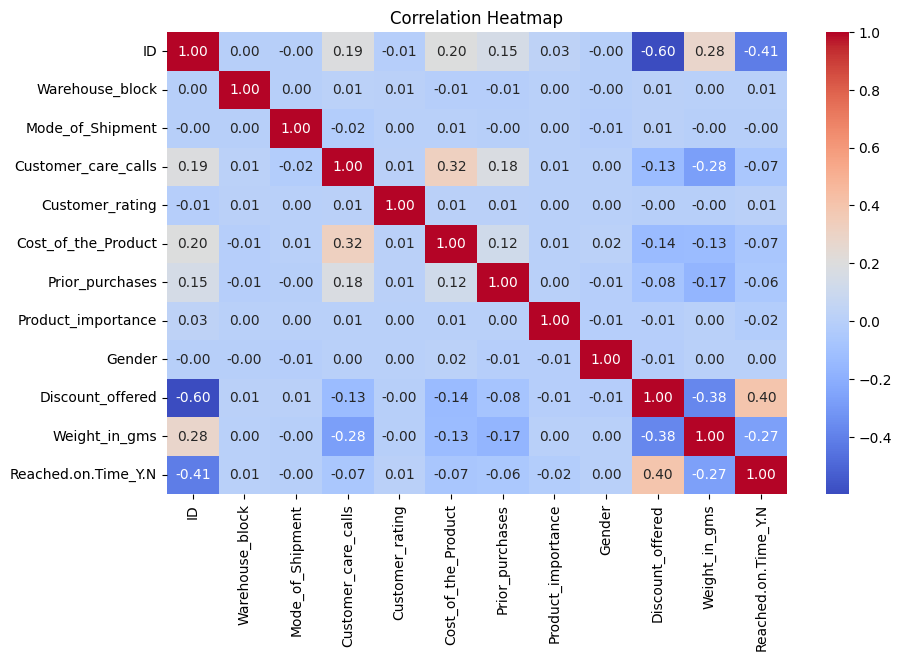

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
sc = StandardScaler()
X = df.drop(columns=['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N'], axis = 1)
y = df['Reached.on.Time_Y.N']

X = sc.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
modelKNC = KNeighborsClassifier()
modelSVC = SVC()
modelNB = GaussianNB()
modelRFC = RandomForestClassifier(random_state = 42, n_estimators = 8, max_depth = 4, min_samples_split = 5, min_samples_leaf = 2)

modelKNC.fit(X_train, y_train)
modelSVC.fit(X_train, y_train)
modelNB.fit(X_train, y_train)
modelRFC.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=8, random_state=42)

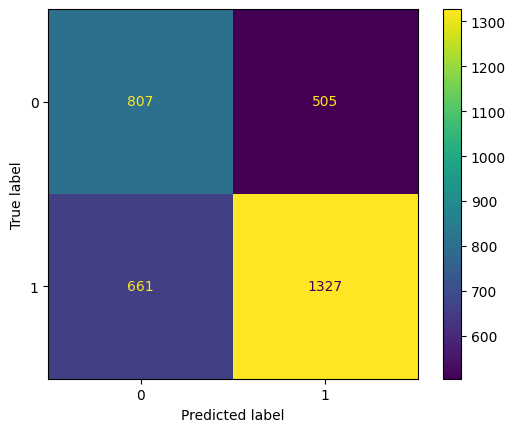

In [11]:
cm = confusion_matrix(y_test, modelKNC.predict(X_test))
disp = ConfusionMatrixDisplay(cm)
disp.plot()


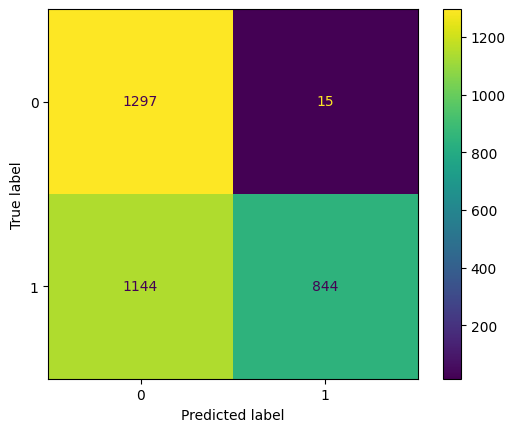

In [12]:
cm = confusion_matrix(y_test, modelNB.predict(X_test))
disp = ConfusionMatrixDisplay(cm)
disp.plot()

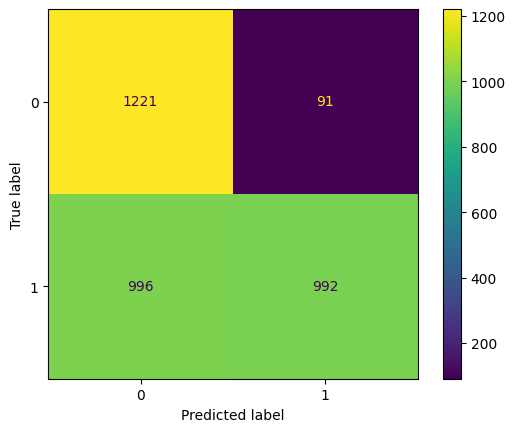

In [13]:
cm = confusion_matrix(y_test, modelSVC.predict(X_test))
disp = ConfusionMatrixDisplay(cm)
disp.plot()

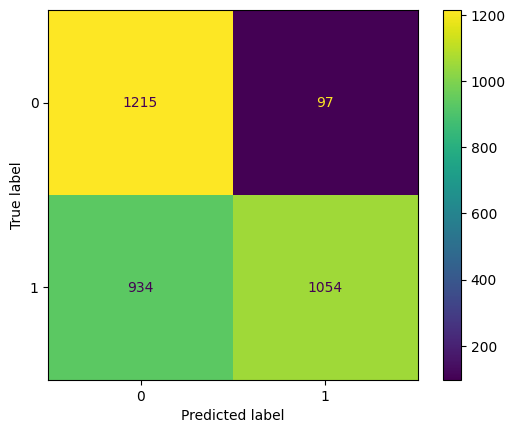

In [14]:
cm = confusion_matrix(y_test, modelRFC.predict(X_test))
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [15]:
print("K-Nearest Neighbor :", accuracy_score(y_test,modelKNC.predict(X_test)))
print(classification_report(y_test,modelKNC.predict(X_test)))

print("Naive Bayes :", accuracy_score(y_test,modelNB.predict(X_test)))
print(classification_report(y_test,modelNB.predict(X_test)))

print("SVC :", accuracy_score(y_test,modelSVC.predict(X_test)))
print(classification_report(y_test,modelSVC.predict(X_test)))

print("Random Forest :", accuracy_score(y_test,modelRFC.predict(X_test)))
print(classification_report(y_test,modelRFC.predict(X_test)))

K-Nearest Neighbor : 0.6466666666666666
              precision    recall  f1-score   support

           0       0.55      0.62      0.58      1312
           1       0.72      0.67      0.69      1988

    accuracy                           0.65      3300
   macro avg       0.64      0.64      0.64      3300
weighted avg       0.65      0.65      0.65      3300

Naive Bayes : 0.6487878787878788
              precision    recall  f1-score   support

           0       0.53      0.99      0.69      1312
           1       0.98      0.42      0.59      1988

    accuracy                           0.65      3300
   macro avg       0.76      0.71      0.64      3300
weighted avg       0.80      0.65      0.63      3300

SVC : 0.6706060606060606
              precision    recall  f1-score   support

           0       0.55      0.93      0.69      1312
           1       0.92      0.50      0.65      1988

    accuracy                           0.67      3300
   macro avg       0.73      0

In [16]:
# Check Training Score
print(modelKNC.score(X_train, y_train))
print(modelSVC.score(X_train, y_train))
print(modelNB.score(X_train, y_train))
print(modelRFC.score(X_train, y_train))

0.7752954929211586
0.6861930120794908
0.6529419405117548
0.6899597350305234


C:\Users\Rave\AppData\Local\Temp\ipykernel_26820\3328279615.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score, y=model, palette='viridis')


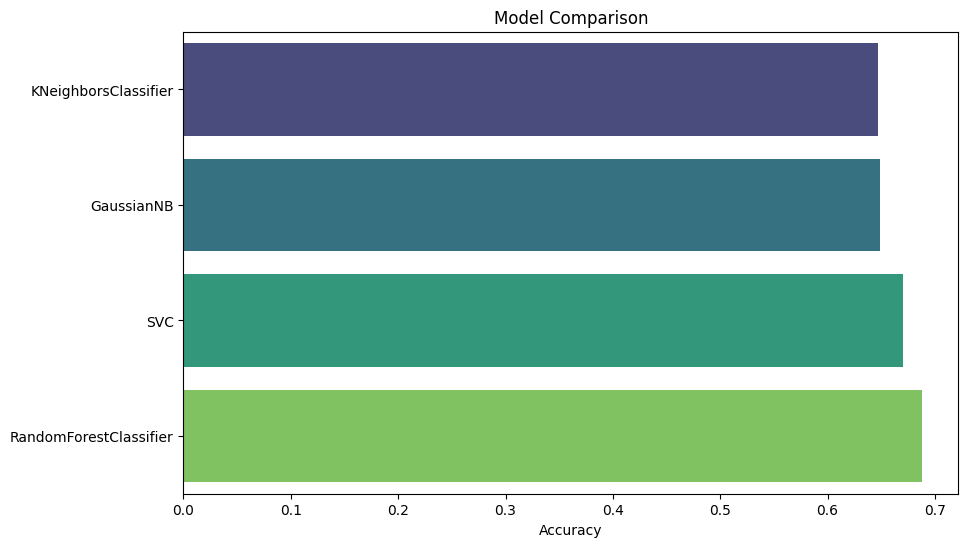

In [17]:
knn = accuracy_score(y_test,modelKNC.predict(X_test))
nb = accuracy_score(y_test,modelNB.predict(X_test))
svc = accuracy_score(y_test,modelSVC.predict(X_test))
rfc = accuracy_score(y_test,modelRFC.predict(X_test))

model = ['KNeighborsClassifier', 'GaussianNB', 'SVC', 'RandomForestClassifier']

score = [knn, nb, svc, rfc]

plt.figure(figsize=(10, 6))
sns.barplot(x=score, y=model, palette='viridis')
plt.title('Model Comparison')
plt.xlabel('Accuracy')
plt.show()